# Stack Overflow Developer Survey 2017 Analysis

This notebook analyzes the 2017 Stack Overflow Developer Survey dataset using the CRISP-DM framework to answer three key questions:

1. **How do developer salaries differ across countries, and what factors contribute to these differences?**
2. **Which programming languages or technologies correlate with higher salaries?**
3. **How does remote work frequency affect job satisfaction and productivity?**

---


## 1. Data Loading and Preparation

In this section, we:
- Load the dataset
- Explore its structure and key features
- Clean missing or irrelevant data
- Prepare derived variables for analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'survey_results_public.csv'
survey_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(survey_data.info())
survey_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
None


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Exploratory Data Analysis (EDA)

We analyze the data to gain insights into:
- Geographic salary trends
- Technology usage and salary correlation
- Remote work and job satisfaction relationships


### Question 1: Geographic Salary Distribution

/var/folders/h2/zp8zb3096txd_y6r0xd662fm0000gn/T/ipykernel_41679/2172771223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


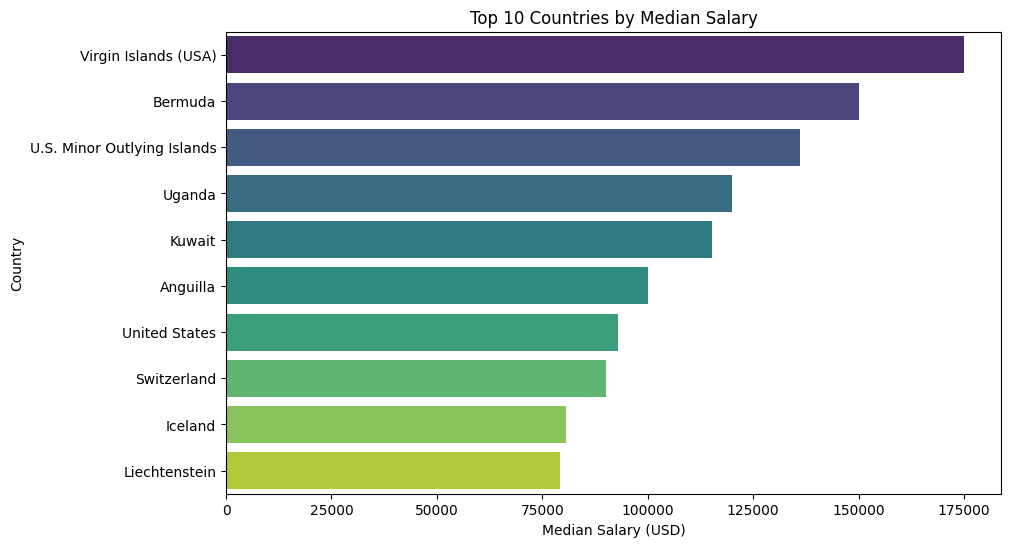

In [4]:
# Analyze salary trends by country
salary_by_country = survey_data.groupby('Country')['Salary'].median().sort_values(ascending=False)
# Get the top 10 countries by median salary
top_10_countries = salary_by_country.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries by Median Salary')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Country')
plt.show()


### Question 2: Technology Popularity and Salary

Salary        1.000000
 Ruby         0.073356
 Python       0.070612
 Perl         0.066314
 Go           0.066075
                ...   
Java         -0.045266
PHP          -0.051359
JavaScript   -0.058874
 PHP         -0.169269
TypeScript         NaN
Name: Salary, Length: 70, dtype: float64


/var/folders/h2/zp8zb3096txd_y6r0xd662fm0000gn/T/ipykernel_36837/1587849158.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='coolwarm')


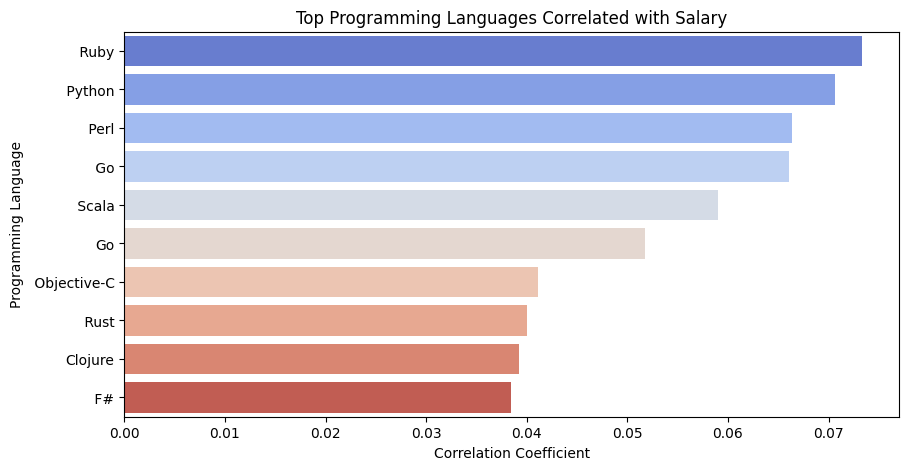

In [3]:
# Analyze correlation between programming languages and salary
# Split 'LanguageWorkedWith' column into individual languages
languages = survey_data['HaveWorkedLanguage'].dropna().str.get_dummies(sep=';')
languages['Salary'] = survey_data['Salary']
correlation = languages.corr()['Salary'].sort_values(ascending=False)
print(correlation)

# Visualize top correlated languages
top_languages = correlation[1:11]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='coolwarm')
plt.title('Top Programming Languages Correlated with Salary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Programming Language')
plt.show()

### Question 3: Work-Life Balance

/var/folders/h2/zp8zb3096txd_y6r0xd662fm0000gn/T/ipykernel_36837/695609856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_vs_satisfaction.index, y=remote_vs_satisfaction.values, palette='viridis')


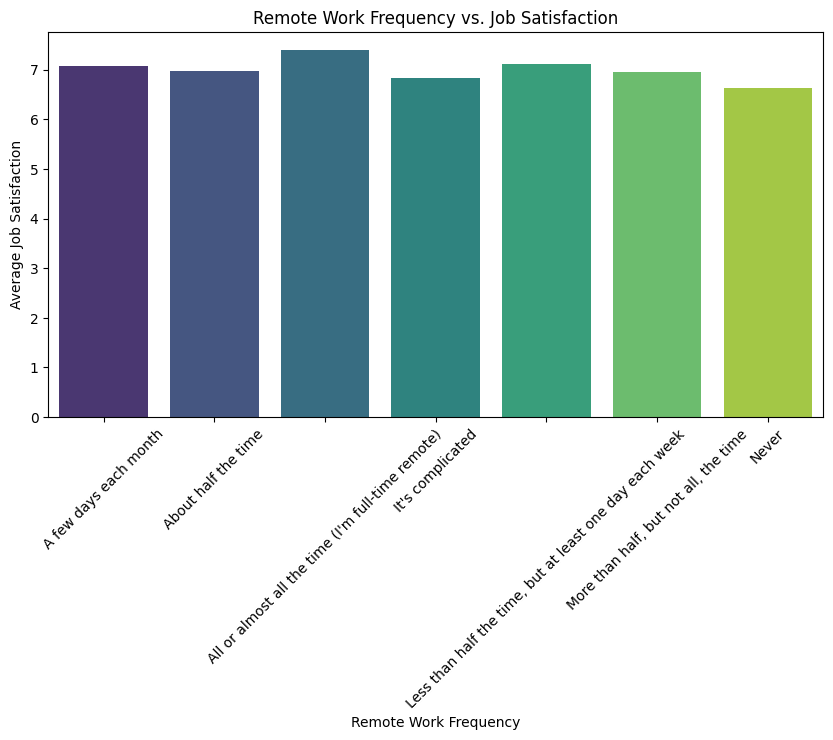

In [4]:
# Analyze relationship between remote work and job satisfaction
remote_vs_satisfaction = survey_data.groupby('HomeRemote')['JobSatisfaction'].mean().dropna()
plt.figure(figsize=(10, 5))
sns.barplot(x=remote_vs_satisfaction.index, y=remote_vs_satisfaction.values, palette='viridis')
plt.title('Remote Work Frequency vs. Job Satisfaction')
plt.xlabel('Remote Work Frequency')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

## 3. Modeling

### Linear Regression: Predicting Salary by Country and Experience
We use linear regression to model the impact of geographic location and years of experience on salaries.

In [5]:


def extract_years(value):
    if pd.isna(value):
        return np.nan
    if 'Less than a year' in value:
        return 0
    if 'More than' in value:
        return 20
    years = [int(s) for s in value.split() if s.isdigit()]
    return max(years) if years else np.nan

# Apply transformation
survey_data['YearsCodingTransformed'] = survey_data['YearsProgram'].apply(extract_years)

# Handle missing values in the transformed column
survey_data['YearsCodingTransformed'].fillna(survey_data['YearsCodingTransformed'].median(), inplace=True)

# Display result
survey_data[['YearsProgram', 'YearsCodingTransformed']].head()

# Function to create dummy variables
def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), 
                            pd.get_dummies(df[col], prefix=col, prefix_sep='_', 
                                           drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

# Identify categorical columns
cat_df = survey_data.select_dtypes(include=['object'])
categorical_columns = cat_df.columns


from sklearn.preprocessing import StandardScaler

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=0.3, rand_state=42):
    # Drop rows with missing values in the response variable
    df = df.dropna(subset=[response_col], axis=0)

    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Create dummy variables for categorical columns
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Fill missing numerical values with column mean
    df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

    # Separate explanatory (X) and response (y) variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    # Separate numerical columns from categorical columns (after dummy encoding)
    numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns

    # Ensure that only numerical columns are passed to StandardScaler
    scaler = StandardScaler()

    # Only scale the numerical columns (exclude categorical ones)
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Fit Linear Regression Model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    # Predict and evaluate
    y_train_preds = lm_model.predict(X_train)
    y_test_preds = lm_model.predict(X_test)

    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
 


/var/folders/h2/zp8zb3096txd_y6r0xd662fm0000gn/T/ipykernel_36837/3749241111.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_data['YearsCodingTransformed'].fillna(survey_data['YearsCodingTransformed'].median(), inplace=True)


In [30]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(
    survey_data, 
    response_col='Salary', 
    cat_cols=categorical_columns, 
    dummy_na=False
)
print(f"Test R² Score: {test_score}")
print(f"Train R² Score: {train_score}")


Test R² Score: -0.6095991899568856
Train R² Score: 1.0


In [ ]:
# For Job Satisfaction Prediction
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(
    survey_data, 
    response_col='JobSatisfaction', 
    cat_cols=categorical_columns, 
    dummy_na=True
)
print(f"Test R² Score: {test_score}")
print(f"Train R² Score: {train_score}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of AIThreat
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='AIThreat', order=['Yes', 'No', "I'm not sure"])
plt.title('Distribution of AI Threat Perception', fontsize=14)
plt.xlabel('AI Threat Perception', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
